In [1]:
import networkx as nx
import numpy as np
import sys
from matplotlib import pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

(4, 3)
[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]
 [ 0.  0. -1.]]
(4, 10)
(3, 10)
(3, 10)
========================= 1x1x4 SP Table =========================
Eigenval:  (1+0j)
Eigenvec:  [1.72307743e-32+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00-0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00-0.j
 0.00000000e+00+0.j]
Eigenval:  (1+0j)
Eigenvec:  [7.76005088e-17+0.j 7.76005088e-17+0.j 0.00000000e+00+0.j
 0.00000000e+00-0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00-0.j
 0.00000000e+00+0.j]
Eigenval:  (1+0j)
Eigenvec:  [0.34948162+0.j 0.34948162+0.j 0.34948162+0.j 0.        -0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        -0.j 0.        +0.j]
Eigenval:  (0.9450680868231324+0.8545175144390458j)
Eigenvec:  [-3.49481623e-001+0.j -3.49481623e-001+0.j -3.49481623e-001+0.j
  0.00000000e+000-0.j  0.00000000e+000+0.j  5.01042090e-292+0.j
  0.00000000e+000+0

/tmp/ipykernel_17497/3161500718.py:12: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  incidence_matrix = -nx.incidence_matrix(G, oriented=True)


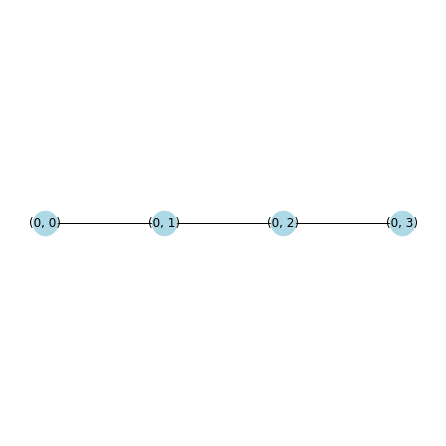

In [2]:
# 1x1x4
# A : 4x3
G = nx.grid_graph((4,1))

plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='lightblue', 
        with_labels=True,
        node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(A)

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

# sparse table analysis
a = np.block([[A, np.zeros((4, 4)), np.zeros((4, 3))]])
b = np.block([[np.zeros((3, 3)), np.eye(3), -A.T]])
c = np.block([[K_v, K_i, np.zeros((3, 4))]])

print(a.shape)
print(b.shape)
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print("========================= 1x1x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i])
        print("Eigenvec: ", eigenVectors[i])

print("========================= 1x1x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T
print(Y)
L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i])
        print("Eigenvec: ", eigenVectors[i])


(16, 24)
[[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0. -1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  1.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  1.  1.
   0.  0

/tmp/ipykernel_17497/2052896743.py:12: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  incidence_matrix = -nx.incidence_matrix(G, oriented=True)


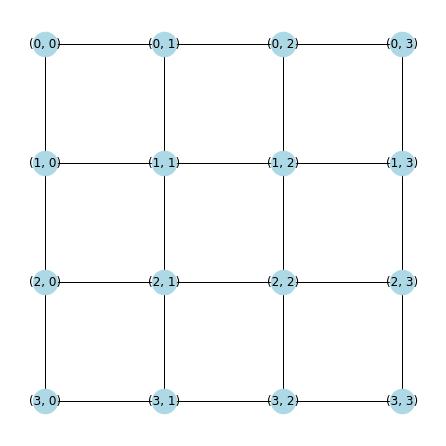

In [3]:
# 1x4x4
# A : 16x24
G = nx.grid_graph((4,4))

plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='lightblue', 
        with_labels=True,
        node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(A)

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

# sparse table analysis
a = np.block([[A, np.zeros((num_nodes, num_branches)), np.zeros((num_nodes, num_nodes))]])
print(a.shape)
b = np.block([[np.zeros((num_branches, num_branches)), np.eye(num_branches), -A.T]])  # 24x16
print(b.shape)
c = np.block([[K_v, K_i, np.zeros((num_branches, num_nodes))]])
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print("========================= 1x4x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i])
        print("Eigenvec: ", eigenVectors[i])

print("========================= 1x4x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T
print(Y)
L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i])
        print("Eigenvec: ", eigenVectors[i])




In [4]:
# 4x4x4
# A : 64x96
G = nx.grid_graph((4,4,4))

plt.figure(figsize=(6,6))
# pos = {(x,y):(y,-x) for x,y in G.nodes()}
# nx.draw(G, pos=pos, 
#         node_color='lightblue', 
#         with_labels=True,
#         node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(A)

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

# sparse table analysis
a = np.block([[A, np.zeros((num_nodes, num_branches)), np.zeros((num_nodes, num_nodes))]])
print(a.shape)
b = np.block([[np.zeros((num_branches, num_branches)), np.eye(num_branches), -A.T]])  # 24x16
print(b.shape)
c = np.block([[K_v, K_i, np.zeros((num_branches, num_nodes))]])
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print("========================= 4x4x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i])
        print("Eigenvec: ", eigenVectors[i])

print("========================= 4x4x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T
print(Y)
L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i])
        print("Eigenvec: ", eigenVectors[i])


/tmp/ipykernel_17497/3051871143.py:12: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  incidence_matrix = -nx.incidence_matrix(G, oriented=True)


(64, 144)
[[ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  

<Figure size 432x432 with 0 Axes>